In [1]:
import pandas as pd

# Load the data
df = pd.read_csv('Housing.csv')

# Display the first few rows of the dataframe
print(df.head())

# Display basic information
print(df.info())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

In [2]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values if any
df.dropna(inplace=True)

# Convert categorical columns to numerical using one-hot encoding
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Check for duplicates
print(df.duplicated().sum())

# Drop duplicates if any
df.drop_duplicates(inplace=True)


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
0


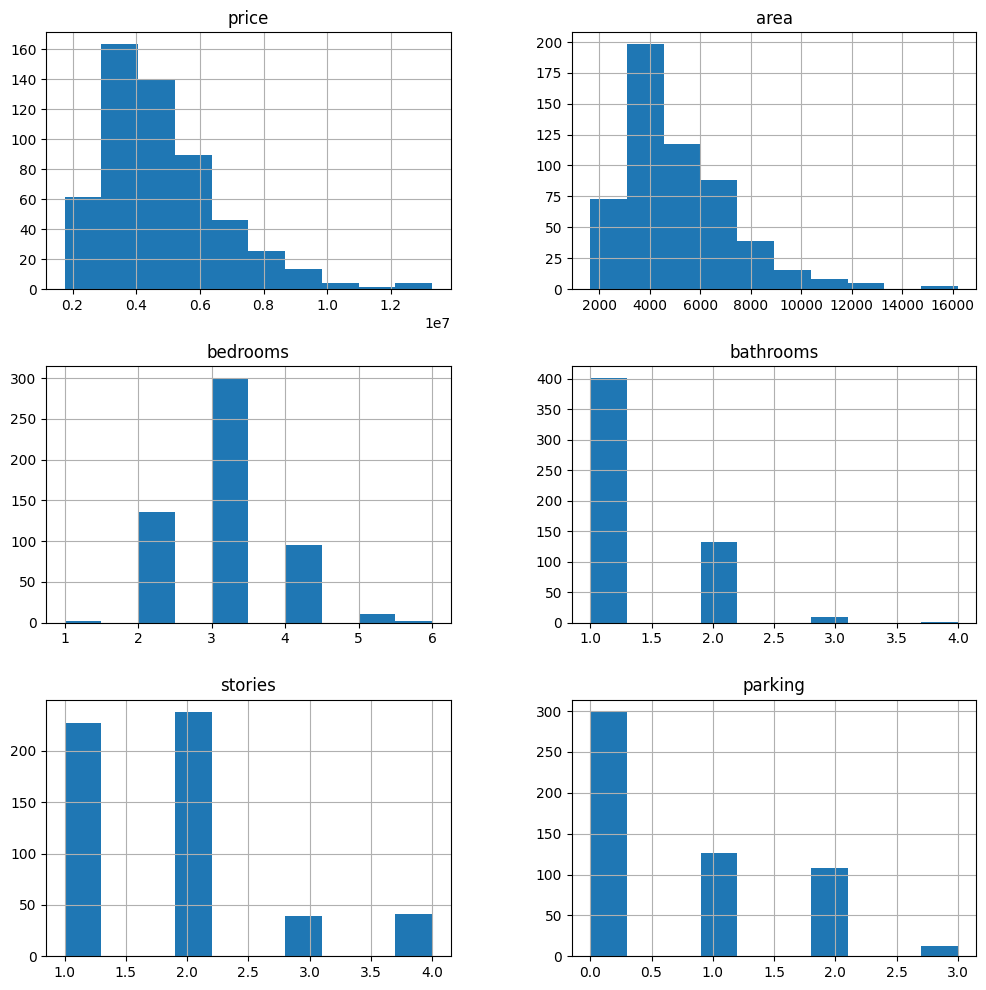

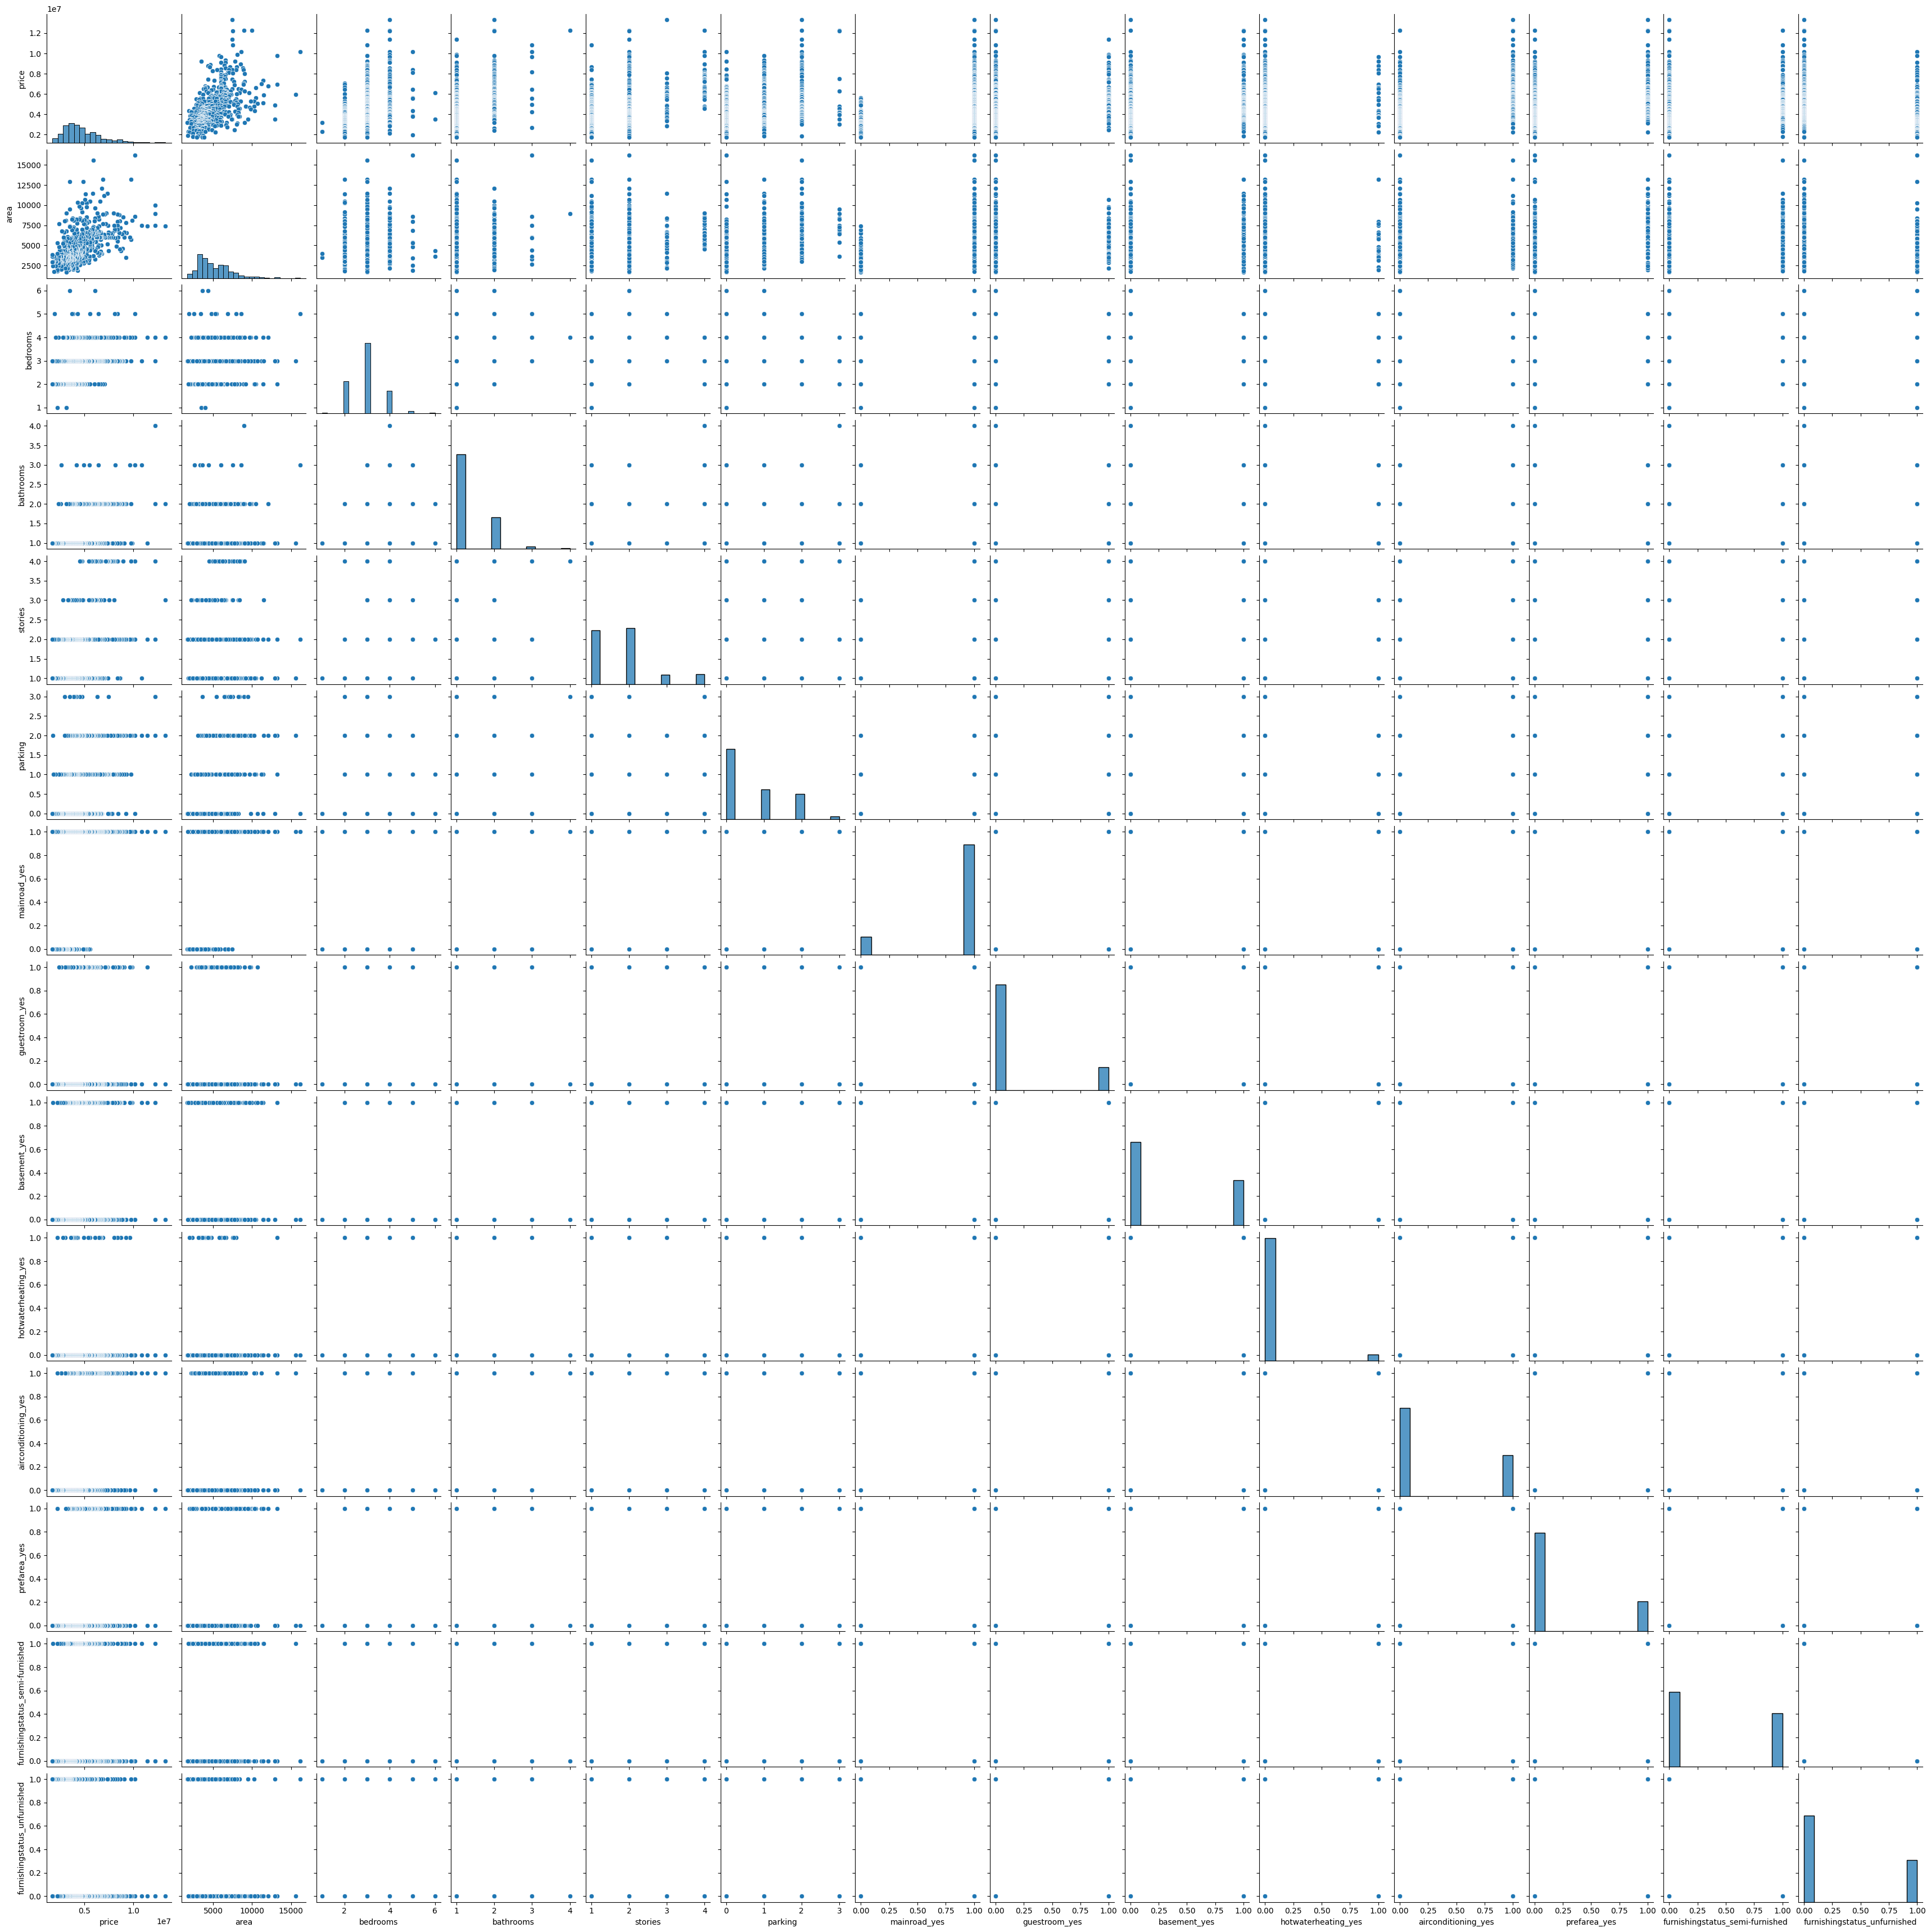

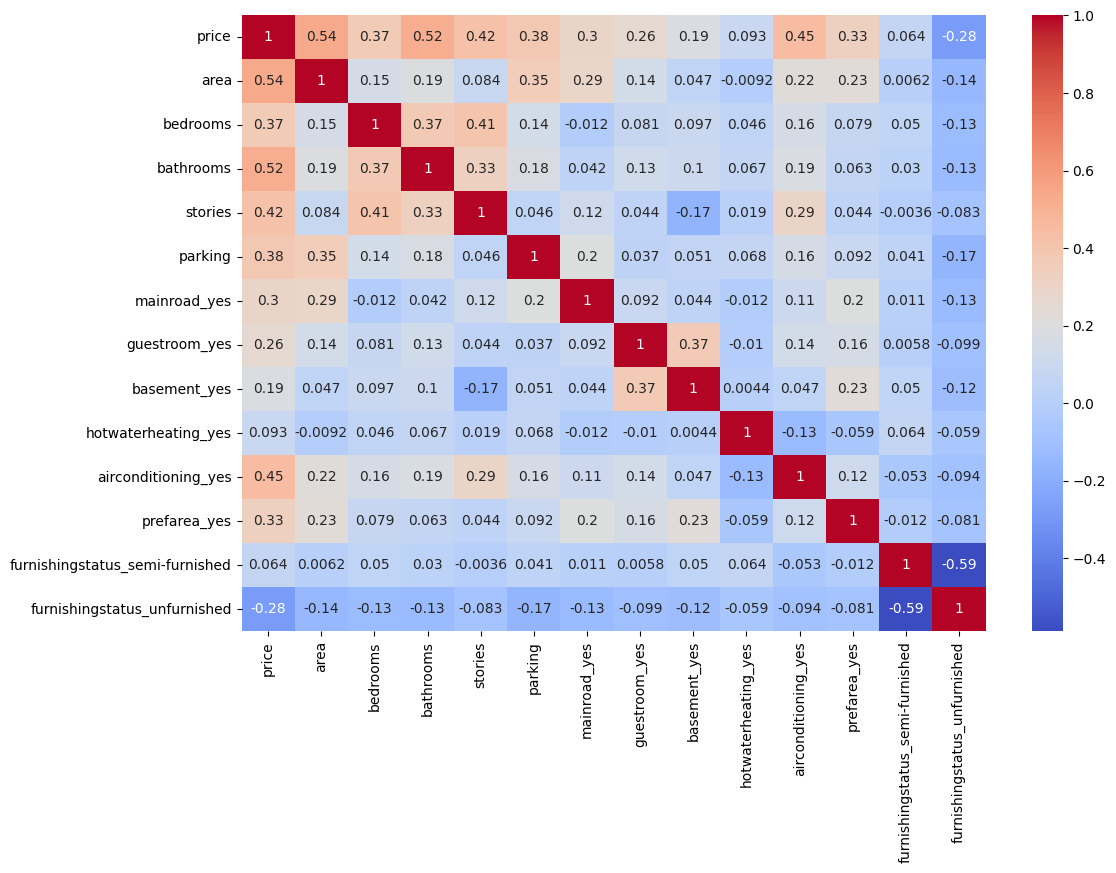

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
df.hist(figsize=(12, 12))
plt.show()

# Pairplot
sns.pairplot(df)
plt.show()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

# Define the target variable and features
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Create a binary target variable
median_price = df['price'].median()
y_binary = (df['price'] > median_price).astype(int)

# Split the binary target variable
y_train_binary = (y_train > median_price).astype(int)
y_test_binary = (y_test > median_price).astype(int)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train_binary)

# Predict and evaluate the model
y_pred = logreg.predict(X_test_scaled)


In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test_binary, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test_binary, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification report
class_report = classification_report(y_test_binary, y_pred)
print('Classification Report:')
print(class_report)


Accuracy: 0.85
Confusion Matrix:
[[47  4]
 [12 46]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.85        51
           1       0.92      0.79      0.85        58

    accuracy                           0.85       109
   macro avg       0.86      0.86      0.85       109
weighted avg       0.86      0.85      0.85       109

